In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mp.__version__

'0.9.1.0'

In [ ]:
mp_facemesh=mp.solutions.face_mesh
mp_drawing=mp.solutions.drawing_utils
denormalize_coord=mp_drawing._normalized_to_pixel_coordinates

In [ ]:
le_idx=set(np.ravel(list(mp_facemesh.FACEMESH_LEFT_EYE)))
re_idx=set(np.ravel(list(mp_facemesh.FACEMESH_RIGHT_EYE)))
all_idx=le_idx.union(re_idx)
chosen_le_idx=[362,385,387,263,374,380]
chosen_re_idx=[33,160,158,133,153,144]
all_chosen_idx=chosen_le_idx+chosen_re_idx

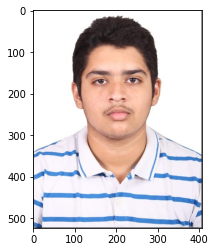

In [ ]:
image=cv2.imread('Shrikrish.jpeg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=np.ascontiguousarray(image)
h,w,_=image.shape
plt.imshow(image)

In [ ]:
with mp_facemesh.FaceMesh(static_image_mode=True) as face_mesh:
    results=face_mesh.process(image)

In [ ]:
print(bool(results.multi_face_landmarks))

True


In [ ]:
print("Detected landmarks are " ,len(results.multi_face_landmarks[0].landmark))

Detected landmarks are  468


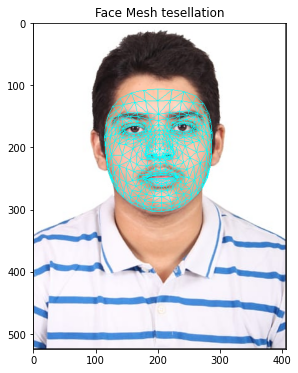

In [ ]:
for face_id,face_landmarks in enumerate(results.multi_face_landmarks):
    image_drawing_tool=image.copy()
    connections_drawing_spec=mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=(0,255,255))
    fig=plt.figure(figsize=(12,6))
    fig.set_facecolor("white")
    mp_drawing.draw_landmarks(image=image_drawing_tool,landmark_list=face_landmarks,connections=mp_facemesh.FACEMESH_TESSELATION,
                             landmark_drawing_spec=None,connection_drawing_spec=connections_drawing_spec)
    plt.title("Face Mesh tesellation")
    plt.imshow(image_drawing_tool)

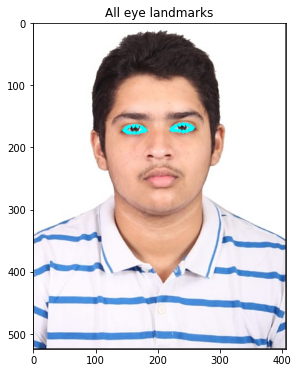

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
image_eye_lmks=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
    if landmark_idx in all_idx:
        pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
        cv2.circle(image_eye_lmks,pred_cord,3,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("All eye landmarks")
plt.imshow(image_eye_lmks)

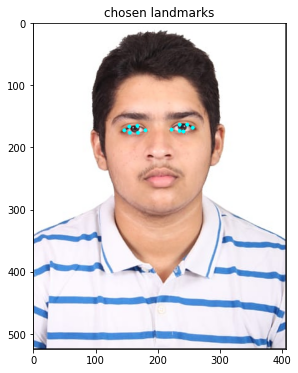

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
image_eye_chosen_lmks=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
    if landmark_idx in all_chosen_idx:
        pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
        cv2.circle(image_eye_chosen_lmks,pred_cord,3,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("chosen landmarks")
plt.imshow(image_eye_chosen_lmks)

In [ ]:
def dist(p1,p2):
    dist=sum([(i-j)**2 for i,j in zip(p1,p2)]) **0.5
    return dist

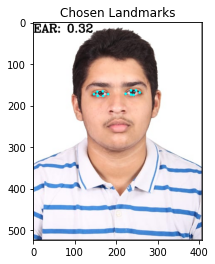

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
for face_id,face_landmarks in enumerate(landmarks):
    coords_points_left=[]
    coords_points_right=[]
    for i in chosen_le_idx:
        lm=landmarks[i]
        coord_left=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_left.append(coord_left)
    for i in chosen_re_idx:
        lm=landmarks[i]
        coord_right=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_right.append(coord_right)
p2_p6_l=dist(coords_points_left[1],coords_points_left[5])
p3_p5_l=dist(coords_points_left[2],coords_points_left[4])
p1_p4_l=dist(coords_points_left[0],coords_points_left[3])
p2_p6_r=dist(coords_points_right[1],coords_points_right[5])
p3_p5_r=dist(coords_points_right[2],coords_points_right[4])
p1_p4_r=dist(coords_points_right[0],coords_points_right[3])
left_ear=(p2_p6_l+p3_p5_l)/(2.0 * p1_p4_l)
right_ear=(p2_p6_r+p3_p5_r)/(2.0 * p1_p4_r)
ear=(left_ear+right_ear)/2.0
cv2.putText(image_eye_chosen_lmks,f"EAR: {round(ear,3)}",(1,24),cv2.FONT_HERSHEY_COMPLEX,0.9,(0,0,0),2)
plt.title("Chosen Landmarks")
plt.imshow(image_eye_chosen_lmks)    

In [ ]:
print(ear)

0.32013239988612996


In [ ]:
mouth_points=list()
index=list()

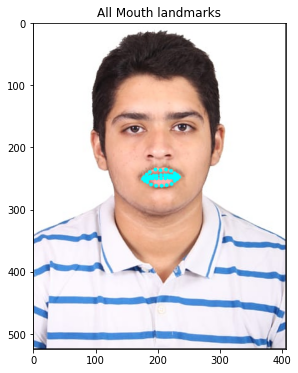

In [ ]:
#All mouth landmarks
mouth_index=set(np.ravel(list(mp_facemesh.FACEMESH_LIPS)))
landmarks=results.multi_face_landmarks[0].landmark
image_mouth_lmks=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
  pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
  if landmark_idx in mouth_index:
    mouth_points.append(pred_cord)
    cv2.circle(image_mouth_lmks,pred_cord,3,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("All Mouth landmarks")
plt.imshow(image_mouth_lmks)

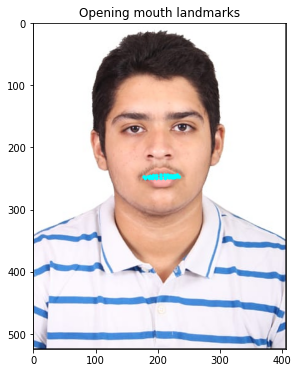

In [ ]:
#particular area of interest
mouth_index=set(np.ravel(list(mp_facemesh.FACEMESH_LIPS)))
landmarks=results.multi_face_landmarks[0].landmark
image_mouth_lmks=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
  pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
  if landmark_idx in mouth_index and pred_cord[1]>=245 and pred_cord[1]<=250:
    mouth_points.append(pred_cord)
    index.append(landmark_idx)
    cv2.circle(image_mouth_lmks,pred_cord,3,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("Opening mouth landmarks")
plt.imshow(image_mouth_lmks)

In [ ]:
chosen_mouth_idx=[13,14,308,78,312,317,82,87]
#[13,14,310,318,291,178,81,78]
#[80,415,14,13,87,88,317,318]

In [ ]:
list(zip(mouth_points,index))

[((204, 237), 13),
 ((205, 245), 14),
 ((205, 250), 78),
 ((206, 262), 80),
 ((196, 236), 81),
 ((187, 240), 82),
 ((182, 244), 87),
 ((176, 251), 88),
 ((180, 250), 178),
 ((188, 247), 185),
 ((193, 246), 191),
 ((198, 246), 291),
 ((197, 262), 308),
 ((198, 250), 310),
 ((187, 250), 311),
 ((183, 256), 312),
 ((184, 251), 317),
 ((179, 254), 318),
 ((192, 250), 324),
 ((189, 260), 402),
 ((178, 248), 409),
 ((184, 248), 415)]

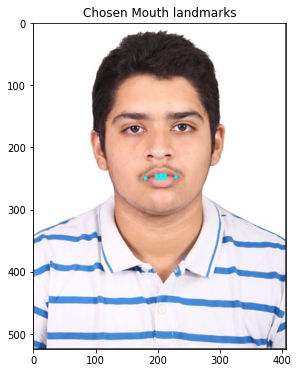

In [ ]:
#chosen region landmarks
landmarks=results.multi_face_landmarks[0].landmark
image_mouth_lmks=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
  pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
  if landmark_idx in chosen_mouth_idx:
    cv2.circle(image_mouth_lmks,pred_cord,3,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("Chosen Mouth landmarks")
plt.imshow(image_mouth_lmks)

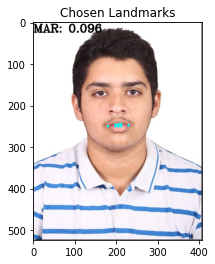

In [ ]:
#compute mar
landmarks=results.multi_face_landmarks[0].landmark
for face_id,face_landmarks in enumerate(landmarks):
    coords_points_mouth=[]
    for i in chosen_mouth_idx:
        lm=landmarks[i]
        coord_point=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_mouth.append(coord_point)

p62_p68=dist(coords_points_mouth[6],coords_points_mouth[7])
p63_p67=dist(coords_points_mouth[0],coords_points_mouth[1])
p64_p66=dist(coords_points_mouth[4],coords_points_mouth[5])
mouth_h=dist(coords_points_mouth[2],coords_points_mouth[3])
mouth_v=(p62_p68+p63_p67+p64_p66)/3
mar=mouth_v/mouth_h

cv2.putText(image_mouth_lmks,f"MAR: {round(mar,3)}",(1,24),cv2.FONT_HERSHEY_COMPLEX,0.9,(0,0,0),2)
plt.title("Chosen Landmarks")
plt.imshow(image_mouth_lmks)

Open Eye and Closed Mouth

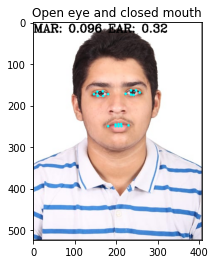

In [ ]:
open_eye_closed_mouth=image.copy()
landmarks=results.multi_face_landmarks[0].landmark
image_eye_chosen_lmks=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
    if landmark_idx in all_chosen_idx or landmark_idx in chosen_mouth_idx:
        pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
        cv2.circle(open_eye_closed_mouth,pred_cord,3,(0,255,255),-1)

cv2.putText(open_eye_closed_mouth,f"MAR: {round(mar,3)} EAR: {round(ear,3)}",(1,24),cv2.FONT_HERSHEY_COMPLEX,0.9,(0,0,0),2)
plt.title("Open eye and closed mouth")
plt.imshow(open_eye_closed_mouth)

In [ ]:
ear_list=list()
ear_list.append(ear)
mar_list=list()
mar_list.append(mar)

Closed Eye and Closed Mouth

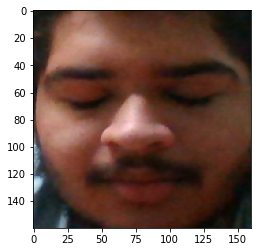

In [ ]:
image=cv2.imread('Image-0.png')
#image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=np.ascontiguousarray(image)
h,w,_=image.shape
plt.imshow(image)

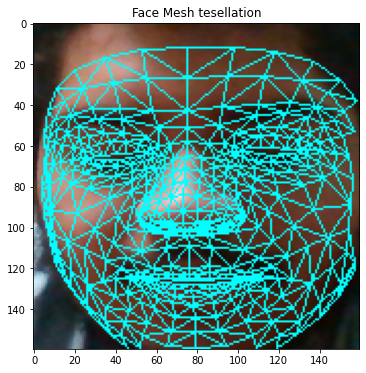

In [ ]:
with mp_facemesh.FaceMesh(static_image_mode=True) as face_mesh:
    results=face_mesh.process(image)
for face_id,face_landmarks in enumerate(results.multi_face_landmarks):
    image_drawing_tool=image.copy()
    connections_drawing_spec=mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=(0,255,255))
    fig=plt.figure(figsize=(12,6))
    fig.set_facecolor("white")
    mp_drawing.draw_landmarks(image=image_drawing_tool,landmark_list=face_landmarks,connections=mp_facemesh.FACEMESH_TESSELATION,
                             landmark_drawing_spec=None,connection_drawing_spec=connections_drawing_spec)
    plt.title("Face Mesh tesellation")
    plt.imshow(image_drawing_tool)

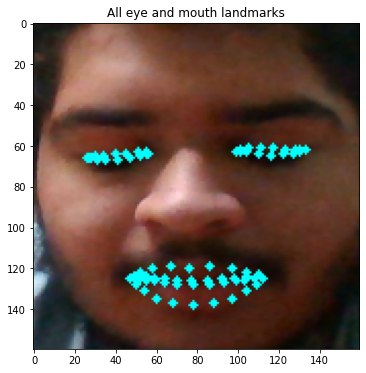

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
closed_eye_closed_mouth=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
    if landmark_idx in all_idx or landmark_idx in mouth_index:
        pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
        cv2.circle(closed_eye_closed_mouth,pred_cord,2,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("All eye and mouth landmarks")
plt.imshow(closed_eye_closed_mouth)

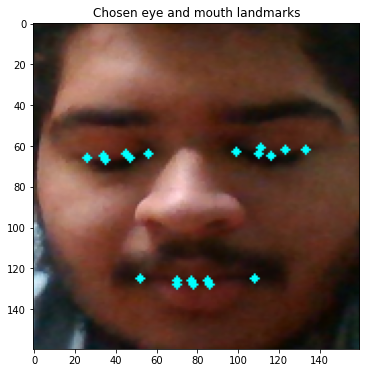

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
closed_eye_closed_mouth=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
    if landmark_idx in all_chosen_idx or landmark_idx in chosen_mouth_idx:
        pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
        cv2.circle(closed_eye_closed_mouth,pred_cord,2,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("Chosen eye and mouth landmarks")
plt.imshow(closed_eye_closed_mouth)

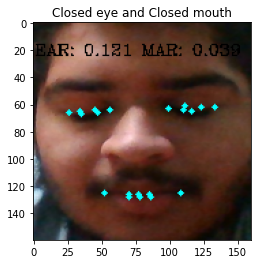

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
for face_id,face_landmarks in enumerate(landmarks): #no.of faces times
    coords_points_left=[]
    coords_points_right=[]
    coords_points_mouth=[]
    for i in chosen_le_idx:
        lm=landmarks[i]
        coord_left=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_left.append(coord_left)
    for i in chosen_re_idx:
        lm=landmarks[i]
        coord_right=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_right.append(coord_right)
    for i in chosen_mouth_idx:
        lm=landmarks[i]
        coord_point=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_mouth.append(coord_point)
p2_p6_l=dist(coords_points_left[1],coords_points_left[5])
p3_p5_l=dist(coords_points_left[2],coords_points_left[4])
p1_p4_l=dist(coords_points_left[0],coords_points_left[3])
p2_p6_r=dist(coords_points_right[1],coords_points_right[5])
p3_p5_r=dist(coords_points_right[2],coords_points_right[4])
p1_p4_r=dist(coords_points_right[0],coords_points_right[3])
left_ear=(p2_p6_l+p3_p5_l)/(2.0 * p1_p4_l)
right_ear=(p2_p6_r+p3_p5_r)/(2.0 * p1_p4_r)
ear=(left_ear+right_ear)/2.0
p62_p68=dist(coords_points_mouth[6],coords_points_mouth[7])
p63_p67=dist(coords_points_mouth[0],coords_points_mouth[1])
p64_p66=dist(coords_points_mouth[4],coords_points_mouth[5])
mouth_h=dist(coords_points_mouth[2],coords_points_mouth[3])
mouth_v=(p62_p68+p63_p67+p64_p66)/3
mar=mouth_v/mouth_h

cv2.putText(closed_eye_closed_mouth,f"EAR: {round(ear,3)} MAR: {round(mar,3)}",(1,24),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,0),1)
plt.title("Closed eye and Closed mouth")
plt.imshow(closed_eye_closed_mouth) 

In [ ]:
ear_list.append(ear)
mar_list.append(mar)

Open Mouth and Closed Eye

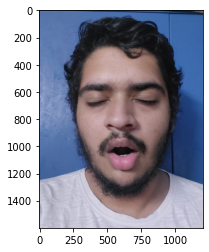

In [ ]:
image=cv2.imread('Image-2.jpeg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=np.ascontiguousarray(image)
h,w,_=image.shape
plt.imshow(image)

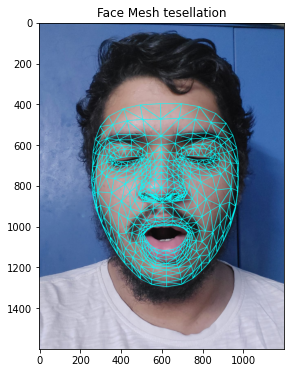

In [ ]:
with mp_facemesh.FaceMesh(static_image_mode=True) as face_mesh:
    results=face_mesh.process(image)
for face_id,face_landmarks in enumerate(results.multi_face_landmarks):
    image_drawing_tool=image.copy()
    connections_drawing_spec=mp_drawing.DrawingSpec(thickness=2,circle_radius=2,color=(0,255,255))
    fig=plt.figure(figsize=(12,6))
    fig.set_facecolor("white")
    mp_drawing.draw_landmarks(image=image_drawing_tool,landmark_list=face_landmarks,connections=mp_facemesh.FACEMESH_TESSELATION,
                             landmark_drawing_spec=None,connection_drawing_spec=connections_drawing_spec)
    plt.title("Face Mesh tesellation")
    plt.imshow(image_drawing_tool)

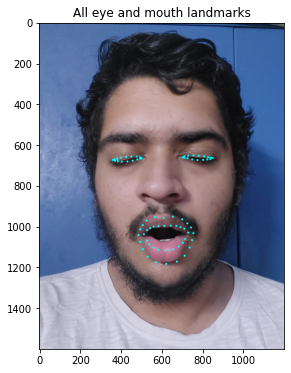

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
closed_eye_open_mouth=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
    if landmark_idx in all_idx or landmark_idx in mouth_index:
        pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
        cv2.circle(closed_eye_open_mouth,pred_cord,5,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("All eye and mouth landmarks")
plt.imshow(closed_eye_open_mouth)

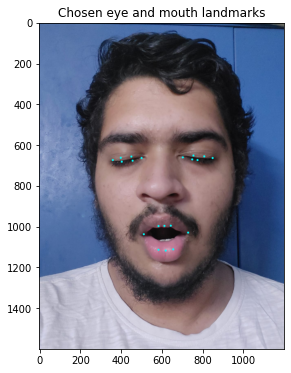

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
closed_eye_open_mouth=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
    if landmark_idx in all_chosen_idx or landmark_idx in chosen_mouth_idx:
        pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
        cv2.circle(closed_eye_open_mouth,pred_cord,5,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("Chosen eye and mouth landmarks")
plt.imshow(closed_eye_open_mouth)

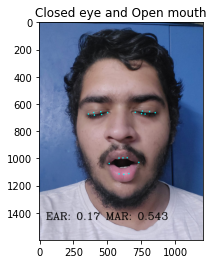

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
for face_id,face_landmarks in enumerate(landmarks): #no.of faces times
    coords_points_left=[]
    coords_points_right=[]
    coords_points_mouth=[]
    for i in chosen_le_idx:
        lm=landmarks[i]
        coord_left=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_left.append(coord_left)
    for i in chosen_re_idx:
        lm=landmarks[i]
        coord_right=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_right.append(coord_right)
    for i in chosen_mouth_idx:
        lm=landmarks[i]
        coord_point=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_mouth.append(coord_point)
p2_p6_l=dist(coords_points_left[1],coords_points_left[5])
p3_p5_l=dist(coords_points_left[2],coords_points_left[4])
p1_p4_l=dist(coords_points_left[0],coords_points_left[3])
p2_p6_r=dist(coords_points_right[1],coords_points_right[5])
p3_p5_r=dist(coords_points_right[2],coords_points_right[4])
p1_p4_r=dist(coords_points_right[0],coords_points_right[3])
left_ear=(p2_p6_l+p3_p5_l)/(2.0 * p1_p4_l)
right_ear=(p2_p6_r+p3_p5_r)/(2.0 * p1_p4_r)
ear=(left_ear+right_ear)/2.0
p62_p68=dist(coords_points_mouth[6],coords_points_mouth[7])
p63_p67=dist(coords_points_mouth[0],coords_points_mouth[1])
p64_p66=dist(coords_points_mouth[4],coords_points_mouth[5])
mouth_h=dist(coords_points_mouth[2],coords_points_mouth[3])
mouth_v=(p62_p68+p63_p67+p64_p66)/3
mar=mouth_v/mouth_h

cv2.putText(closed_eye_open_mouth,f"EAR: {round(ear,3)} MAR: {round(mar,3)}",(50,1450),cv2.FONT_HERSHEY_COMPLEX,2.5,(0,0,0),4)
plt.title("Closed eye and Open mouth")
plt.imshow(closed_eye_open_mouth) 

In [ ]:
ear_list.append(ear)
mar_list.append(mar)

Open Eye and Open Mouth

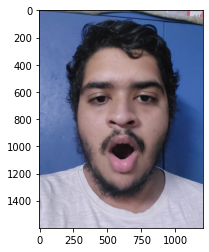

In [ ]:
image=cv2.imread('Image-1.jpeg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=np.ascontiguousarray(image)
h,w,_=image.shape
plt.imshow(image)

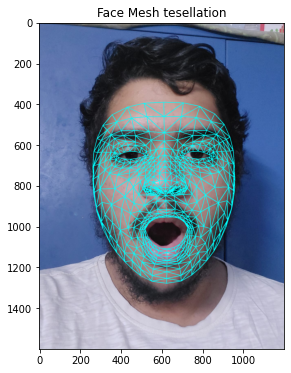

In [ ]:
with mp_facemesh.FaceMesh(static_image_mode=True) as face_mesh:
    results=face_mesh.process(image)
for face_id,face_landmarks in enumerate(results.multi_face_landmarks):
    image_drawing_tool=image.copy()
    connections_drawing_spec=mp_drawing.DrawingSpec(thickness=2,circle_radius=2,color=(0,255,255))
    fig=plt.figure(figsize=(12,6))
    fig.set_facecolor("white")
    mp_drawing.draw_landmarks(image=image_drawing_tool,landmark_list=face_landmarks,connections=mp_facemesh.FACEMESH_TESSELATION,
                             landmark_drawing_spec=None,connection_drawing_spec=connections_drawing_spec)
    plt.title("Face Mesh tesellation")
    plt.imshow(image_drawing_tool)

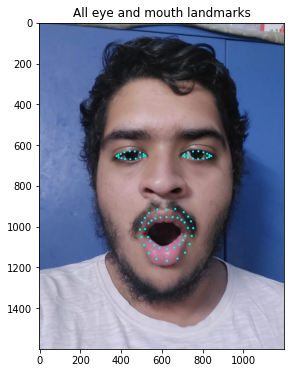

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
open_eye_open_mouth=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
    if landmark_idx in all_idx or landmark_idx in mouth_index:
        pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
        cv2.circle(open_eye_open_mouth,pred_cord,5,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("All eye and mouth landmarks")
plt.imshow(open_eye_open_mouth)

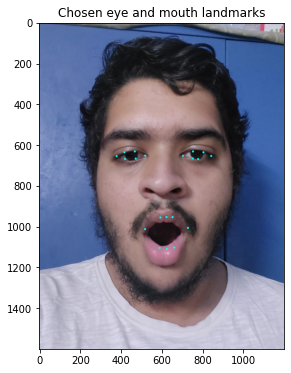

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
open_eye_open_mouth=image.copy()
for landmark_idx,landmark in enumerate(landmarks):
    if landmark_idx in all_chosen_idx or landmark_idx in chosen_mouth_idx:
        pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
        cv2.circle(open_eye_open_mouth,pred_cord,5,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("Chosen eye and mouth landmarks")
plt.imshow(open_eye_open_mouth)

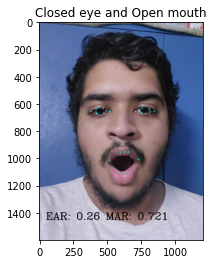

In [ ]:
landmarks=results.multi_face_landmarks[0].landmark
for face_id,face_landmarks in enumerate(landmarks): #no.of faces times
    coords_points_left=[]
    coords_points_right=[]
    coords_points_mouth=[]
    for i in chosen_le_idx:
        lm=landmarks[i]
        coord_left=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_left.append(coord_left)
    for i in chosen_re_idx:
        lm=landmarks[i]
        coord_right=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_right.append(coord_right)
    for i in chosen_mouth_idx:
        lm=landmarks[i]
        coord_point=denormalize_coord(lm.x,lm.y,w,h)
        coords_points_mouth.append(coord_point)
p2_p6_l=dist(coords_points_left[1],coords_points_left[5])
p3_p5_l=dist(coords_points_left[2],coords_points_left[4])
p1_p4_l=dist(coords_points_left[0],coords_points_left[3])
p2_p6_r=dist(coords_points_right[1],coords_points_right[5])
p3_p5_r=dist(coords_points_right[2],coords_points_right[4])
p1_p4_r=dist(coords_points_right[0],coords_points_right[3])
left_ear=(p2_p6_l+p3_p5_l)/(2.0 * p1_p4_l)
right_ear=(p2_p6_r+p3_p5_r)/(2.0 * p1_p4_r)
ear=(left_ear+right_ear)/2.0
p62_p68=dist(coords_points_mouth[6],coords_points_mouth[7])
p63_p67=dist(coords_points_mouth[0],coords_points_mouth[1])
p64_p66=dist(coords_points_mouth[4],coords_points_mouth[5])
mouth_h=dist(coords_points_mouth[2],coords_points_mouth[3])
mouth_v=(p62_p68+p63_p67+p64_p66)/3
mar=mouth_v/mouth_h

cv2.putText(open_eye_open_mouth,f"EAR: {round(ear,3)} MAR: {round(mar,3)}",(50,1450),cv2.FONT_HERSHEY_COMPLEX,2.5,(0,0,0),4)
plt.title("Closed eye and Open mouth")
plt.imshow(open_eye_open_mouth) 

In [ ]:
ear_list.append(ear)
mar_list.append(mar)

In [ ]:
print("EAR for 4 state images is: ",ear_list)
print("MAR for 4 state images is: ",mar_list)

EAR for 4 state images is:  [0.32013239988612996, 0.12132676803508843, 0.17014060092909847, 0.2597761397938984]
MAR for 4 state images is:  [0.095831903932133, 0.0385246187797594, 0.5430530626689565, 0.7207869916181314]


In [ ]:
#threshold ranges
print("The range of ear is: ",(min(ear_list),max(ear_list)))
print("The range of mar is: ",(min(mar_list),max(mar_list)))

The range of ear is:  (0.12132676803508843, 0.32013239988612996)
The range of mar is:  (0.0385246187797594, 0.7207869916181314)


### 2 Face Image

In [ ]:
image=cv2.imread('2_face.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=np.ascontiguousarray(image)
h,w,_=image.shape
plt.imshow(image)

In [ ]:
with mp_facemesh.FaceMesh(static_image_mode=True,max_num_faces=2) as face_mesh:
    results=face_mesh.process(image)

In [ ]:
print(bool(results.multi_face_landmarks))

True


In [ ]:
print("Detected landmarks are " ,len(results.multi_face_landmarks[0].landmark))

Detected landmarks are  468


In [ ]:
image_drawing_tool=image.copy()
for face_id,face_landmarks in enumerate(results.multi_face_landmarks):
    connections_drawing_spec=mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=(0,255,255))
    mp_drawing.draw_landmarks(image=image_drawing_tool,landmark_list=face_landmarks,connections=mp_facemesh.FACEMESH_TESSELATION,
                             landmark_drawing_spec=None,connection_drawing_spec=connections_drawing_spec)
fig=plt.figure(figsize=(12,6))
fig.set_facecolor("white")
plt.title("Face Mesh tesellation")
plt.imshow(image_drawing_tool)

In [ ]:
image_eye_lmks=image.copy()
num_faces=2
for i in range(0,num_faces):
    landmarks=results.multi_face_landmarks[i].landmark
    for landmark_idx,landmark in enumerate(landmarks):
        if landmark_idx in all_idx:
            pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
            cv2.circle(image_eye_lmks,pred_cord,3,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("All eye landmarks")
plt.imshow(image_eye_lmks)

In [ ]:
image_eye_chosen_lmks=image.copy()
num_faces=2
for i in range(0,num_faces):
    landmarks=results.multi_face_landmarks[i].landmark
    for landmark_idx,landmark in enumerate(landmarks):
        if landmark_idx in all_chosen_idx:
            pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
            cv2.circle(image_eye_chosen_lmks,pred_cord,3,(0,255,255),-1)
plt.figure(figsize=(12,6))
plt.title("chosen landmarks")
plt.imshow(image_eye_chosen_lmks)

In [ ]:
num_faces=2
for k in range(0,num_faces):
    landmarks=results.multi_face_landmarks[k].landmark
    
    for face_id,face_landmarks in enumerate(landmarks):
        coords_points_left=[]
        coords_points_right=[]
        for i in chosen_le_idx:
            lm=landmarks[i]
            coord_left=denormalize_coord(lm.x,lm.y,w,h)
            coords_points_left.append(coord_left)
        for i in chosen_re_idx:
            lm=landmarks[i]
            coord_right=denormalize_coord(lm.x,lm.y,w,h)
            coords_points_right.append(coord_right)
    p2_p6_l=dist(coords_points_left[1],coords_points_left[5])
    p3_p5_l=dist(coords_points_left[2],coords_points_left[4])
    p1_p4_l=dist(coords_points_left[0],coords_points_left[3])
    p2_p6_r=dist(coords_points_right[1],coords_points_right[5])
    p3_p5_r=dist(coords_points_right[2],coords_points_right[4])
    p1_p4_r=dist(coords_points_right[0],coords_points_right[3])
    left_ear=(p2_p6_l+p3_p5_l)/(2.0 * p1_p4_l)
    right_ear=(p2_p6_r+p3_p5_r)/(2.0 * p1_p4_r)
    ear=(left_ear+right_ear)/2.0
    if k==0:
        cv2.putText(image_eye_chosen_lmks,f"EAR: {round(ear,3)}",(1,100),cv2.FONT_HERSHEY_COMPLEX,0.9,(0,0,0),2)
    elif k==1:
        cv2.putText(image_eye_chosen_lmks,f"EAR: {round(ear,3)}",(1000,100),cv2.FONT_HERSHEY_COMPLEX,0.9,(0,0,0),2)
plt.figure(figsize=(12,6))        
plt.title("Chosen Landmarks")
plt.imshow(image_eye_chosen_lmks)    

### In Video

In [ ]:
import cv2
video=cv2.VideoCapture("face_video_2.mp4")
writer=None
(W,H)=(None,None)
print("Total frame is " + str(video.get(7)))

Total frame is 144.0


In [ ]:
print("Frames per second is " + str(video.get(5)))

Frames per second is 10.088672895799423


In [ ]:
fps=int(video.get(5))
f_size=(int(video.get(3)),int(video.get(4)))
out_vs=cv2.VideoWriter('Drowsiness_video_3.mp4',cv2.VideoWriter_fourcc(*'XVID'),fps,f_size,isColor=True)

In [ ]:
while True:
    ret,image=video.read()
    if not ret:
        break
    else:
        image=np.ascontiguousarray(image)
        h,w,_=image.shape
        with mp_facemesh.FaceMesh(static_image_mode=True) as face_mesh:
            results=face_mesh.process(image)
        landmarks=results.multi_face_landmarks[0].landmark
        image_eye_chosen_lmks=image.copy()
        for landmark_idx,landmark in enumerate(landmarks):
            if landmark_idx in all_chosen_idx:
                pred_cord=denormalize_coord(landmark.x,landmark.y,w,h)
                cv2.circle(image_eye_chosen_lmks,pred_cord,3,(0,255,255),-1)
        for face_id,face_landmarks in enumerate(landmarks):
            coords_points_left=[]
            coords_points_right=[]
            for i in chosen_le_idx:
                lm=landmarks[i]
                coord_left=denormalize_coord(lm.x,lm.y,w,h)
                coords_points_left.append(coord_left)
            for i in chosen_re_idx:
                lm=landmarks[i]
                coord_right=denormalize_coord(lm.x,lm.y,w,h)
                coords_points_right.append(coord_right)
        p2_p6_l=dist(coords_points_left[1],coords_points_left[5])
        p3_p5_l=dist(coords_points_left[2],coords_points_left[4])
        p1_p4_l=dist(coords_points_left[0],coords_points_left[3])
        p2_p6_r=dist(coords_points_right[1],coords_points_right[5])
        p3_p5_r=dist(coords_points_right[2],coords_points_right[4])
        p1_p4_r=dist(coords_points_right[0],coords_points_right[3])
        left_ear=(p2_p6_l+p3_p5_l)/(2.0 * p1_p4_l)
        right_ear=(p2_p6_r+p3_p5_r)/(2.0 * p1_p4_r)
        ear=(left_ear+right_ear)/2.0
        cv2.putText(image_eye_chosen_lmks,f"EAR: {round(ear,3)}",(1,100),cv2.FONT_HERSHEY_COMPLEX,0.9,(0,0,0),2)
        image_eye_chosen_lmks=cv2.resize(image_eye_chosen_lmks,f_size)
        out_vs.write(image_eye_chosen_lmks)

video.release()
out_vs.release()   